In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

plt.style.use('ggplot')

import nltk
from nltk.tokenize import word_tokenize
import re

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
dataset = load_dataset("amazon_us_reviews","Camera_v1_00")
df = pd.DataFrame(dataset['train']).head(500)

df

Found cached dataset amazon_us_reviews (C:/Users/Splute/.cache/huggingface/datasets/amazon_us_reviews/Camera_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


  0%|          | 0/1 [00:00<?, ?it/s]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,US,3817265,R99R8WCERJULL,B00NW31YSE,705677192,Canary All-in-One Home Security Device,Camera,4,3,3,0,1,Should have some more views and 2-3 days to ch...,Should have some more views and 2-3 days to ch...,2015-08-31
496,US,45595220,R1P4L1QXJLXHQW,B00F5JV4NS,129493899,FotoTech ML-L3 Wireless Shutter Release Remote...,Camera,5,0,0,0,1,Five Stars,Works as described.,2015-08-31
497,US,121175,R20XEM5K76M9YR,B00YIXG9EG,11160417,KingCool WiFi 12MP Full HD 1080P DVR Camcorder...,Camera,5,0,1,0,1,Five Stars,Great little camera. Comes in handy when hooki...,2015-08-31
498,US,46244743,R39VQ7G7W7E7KA,B003LZ5SM6,761331780,Opteka LP-E8 2000mAh Ultra High Capacity Li-io...,Camera,3,0,0,0,1,Three Stars,It's good enough to give the original battery ...,2015-08-31


In [3]:
# 添加一个新的整数索引，并将其保存为'id'列
df['id'] = df.reset_index(drop=True).index
# 将'id'列移动到最左边
id_column = df['id']  # 获取'id'列
df.drop(columns=['id'], inplace=True)  # 删除'id'列
df.insert(0, 'id', id_column)  # 将'id'列插入到第一列

df

,id,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,US,3817265,R99R8WCERJULL,B00NW31YSE,705677192,Canary All-in-One Home Security Device,Camera,4,3,3,0,1,Should have some more views and 2-3 days to ch...,Should have some more views and 2-3 days to ch...,2015-08-31
496,496,US,45595220,R1P4L1QXJLXHQW,B00F5JV4NS,129493899,FotoTech ML-L3 Wireless Shutter Release Remote...,Camera,5,0,0,0,1,Five Stars,Works as described.,2015-08-31
497,497,US,121175,R20XEM5K76M9YR,B00YIXG9EG,11160417,KingCool WiFi 12MP Full HD 1080P DVR Camcorder...,Camera,5,0,1,0,1,Five Stars,Great little camera. Comes in handy when hooki...,2015-08-31
498,498,US,46244743,R39VQ7G7W7E7KA,B003LZ5SM6,761331780,Opteka LP-E8 2000mAh Ultra High Capacity Li-io...,Camera,3,0,0,0,1,Three Stars,It's good enough to give the original battery ...,2015-08-31


## 1. LSTM 

In [17]:
from keras.models import load_model

clf_lstm = load_model('models/biLSTM_tweet.h5')

In [18]:
texts = df['review_body'].tolist()

In [6]:
def clean_text(data):
    # 去除URL链接
    data = re.sub(r'http\S+', '', data)
    
    # 去除@提及的用户名
    data = re.sub(r'@\w+', '', data)
    
    # 去除#标签
    data = re.sub(r'#\w+', '', data)
    
    # 去除RT（转发）标识
    data = re.sub(r'RT\s+', '', data)
    
    # 去除多余的空格和换行符
    data = re.sub(r'\s+', ' ', data).strip()
    
    # tekenization using nltk / 分词
    data = word_tokenize(data)
    
    return data

In [19]:
texts = [' '.join(clean_text(text)) for text in texts]

In [20]:
# Tokenization + fitting using keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [9]:
def polarity_scores_lstm(example, tokenizer):
    cleaned_exa = clean_text(example)
    seq = tokenizer.texts_to_sequences(cleaned_exa)
    padded = pad_sequences(seq, maxlen=500)
    scores = clf_lstm.predict(padded)
    scores_dict = {
        'biLSTM_neg': scores[0][0],
        'biLSTM_neu': scores[0][1],
        'biLSTM_pos': scores[0][2]
    }

    return scores_dict

In [10]:
from tqdm.notebook import tqdm ## to add progress bars to loops and iterations

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['id']

    biLSTM_result = polarity_scores_lstm(example = text, tokenizer = tokenizer)
    # both = {**vader_result_rename, **biLSTM_result}
    both = {**biLSTM_result}

    res[myid] = both

  0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'id'})
result_df = result_df.merge(df, how='left')
result_df.head()

,id,biLSTM_neg,biLSTM_neu,biLSTM_pos,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,0.212135,0.363094,0.424770,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,0.215961,0.360435,0.423604,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,0.103040,0.552293,0.344667,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,0.168093,0.538959,0.292948,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,0.235096,0.514151,0.250754,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31


## 2. roBerta

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer_roberta = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer_roberta(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review_body']
        myid = row['id']
        biLSTM_result = polarity_scores_lstm(example = text, tokenizer = tokenizer)
        roberta_result = polarity_scores_roberta(text)
        both = {**biLSTM_result, **roberta_result}

        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 6
Broke for id 53
Broke for id 181
Broke for id 254
Broke for id 265
Broke for id 290
Broke for id 301
Broke for id 484
Broke for id 492


In [24]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'id'})
result_df = result_df.merge(df, how='left')
result_df.head()

,id,biLSTM_neg,biLSTM_neu,biLSTM_pos,roberta_neg,roberta_neu,roberta_pos,marketplace,customer_id,review_id,...,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,0.212135,0.363094,0.424770,0.300267,0.426239,0.273494,US,2975964,R1NBG94582SJE2,...,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,0.215961,0.360435,0.423604,0.038502,0.092314,0.869183,US,23526356,R273DCA6Y0H9V7,...,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,0.103040,0.552293,0.344667,0.371169,0.417948,0.210883,US,52764145,RQVOXO7WUOFK6,...,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,0.168093,0.538959,0.292948,0.079245,0.207170,0.713585,US,47348933,R1KWKSF21PO6HO,...,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,0.235096,0.514151,0.250754,0.099418,0.112864,0.787718,US,33680700,R38H3UO1J190GI,...,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31


## 3. Comparison

In [25]:
result_df.columns

Index(['id', 'biLSTM_neg', 'biLSTM_neu', 'biLSTM_pos', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'marketplace', 'customer_id', 'review_id',
       'product_id', 'product_parent', 'product_title', 'product_category',
       'star_rating', 'helpful_votes', 'total_votes', 'vine',
       'verified_purchase', 'review_headline', 'review_body', 'review_date'],
      dtype='object')

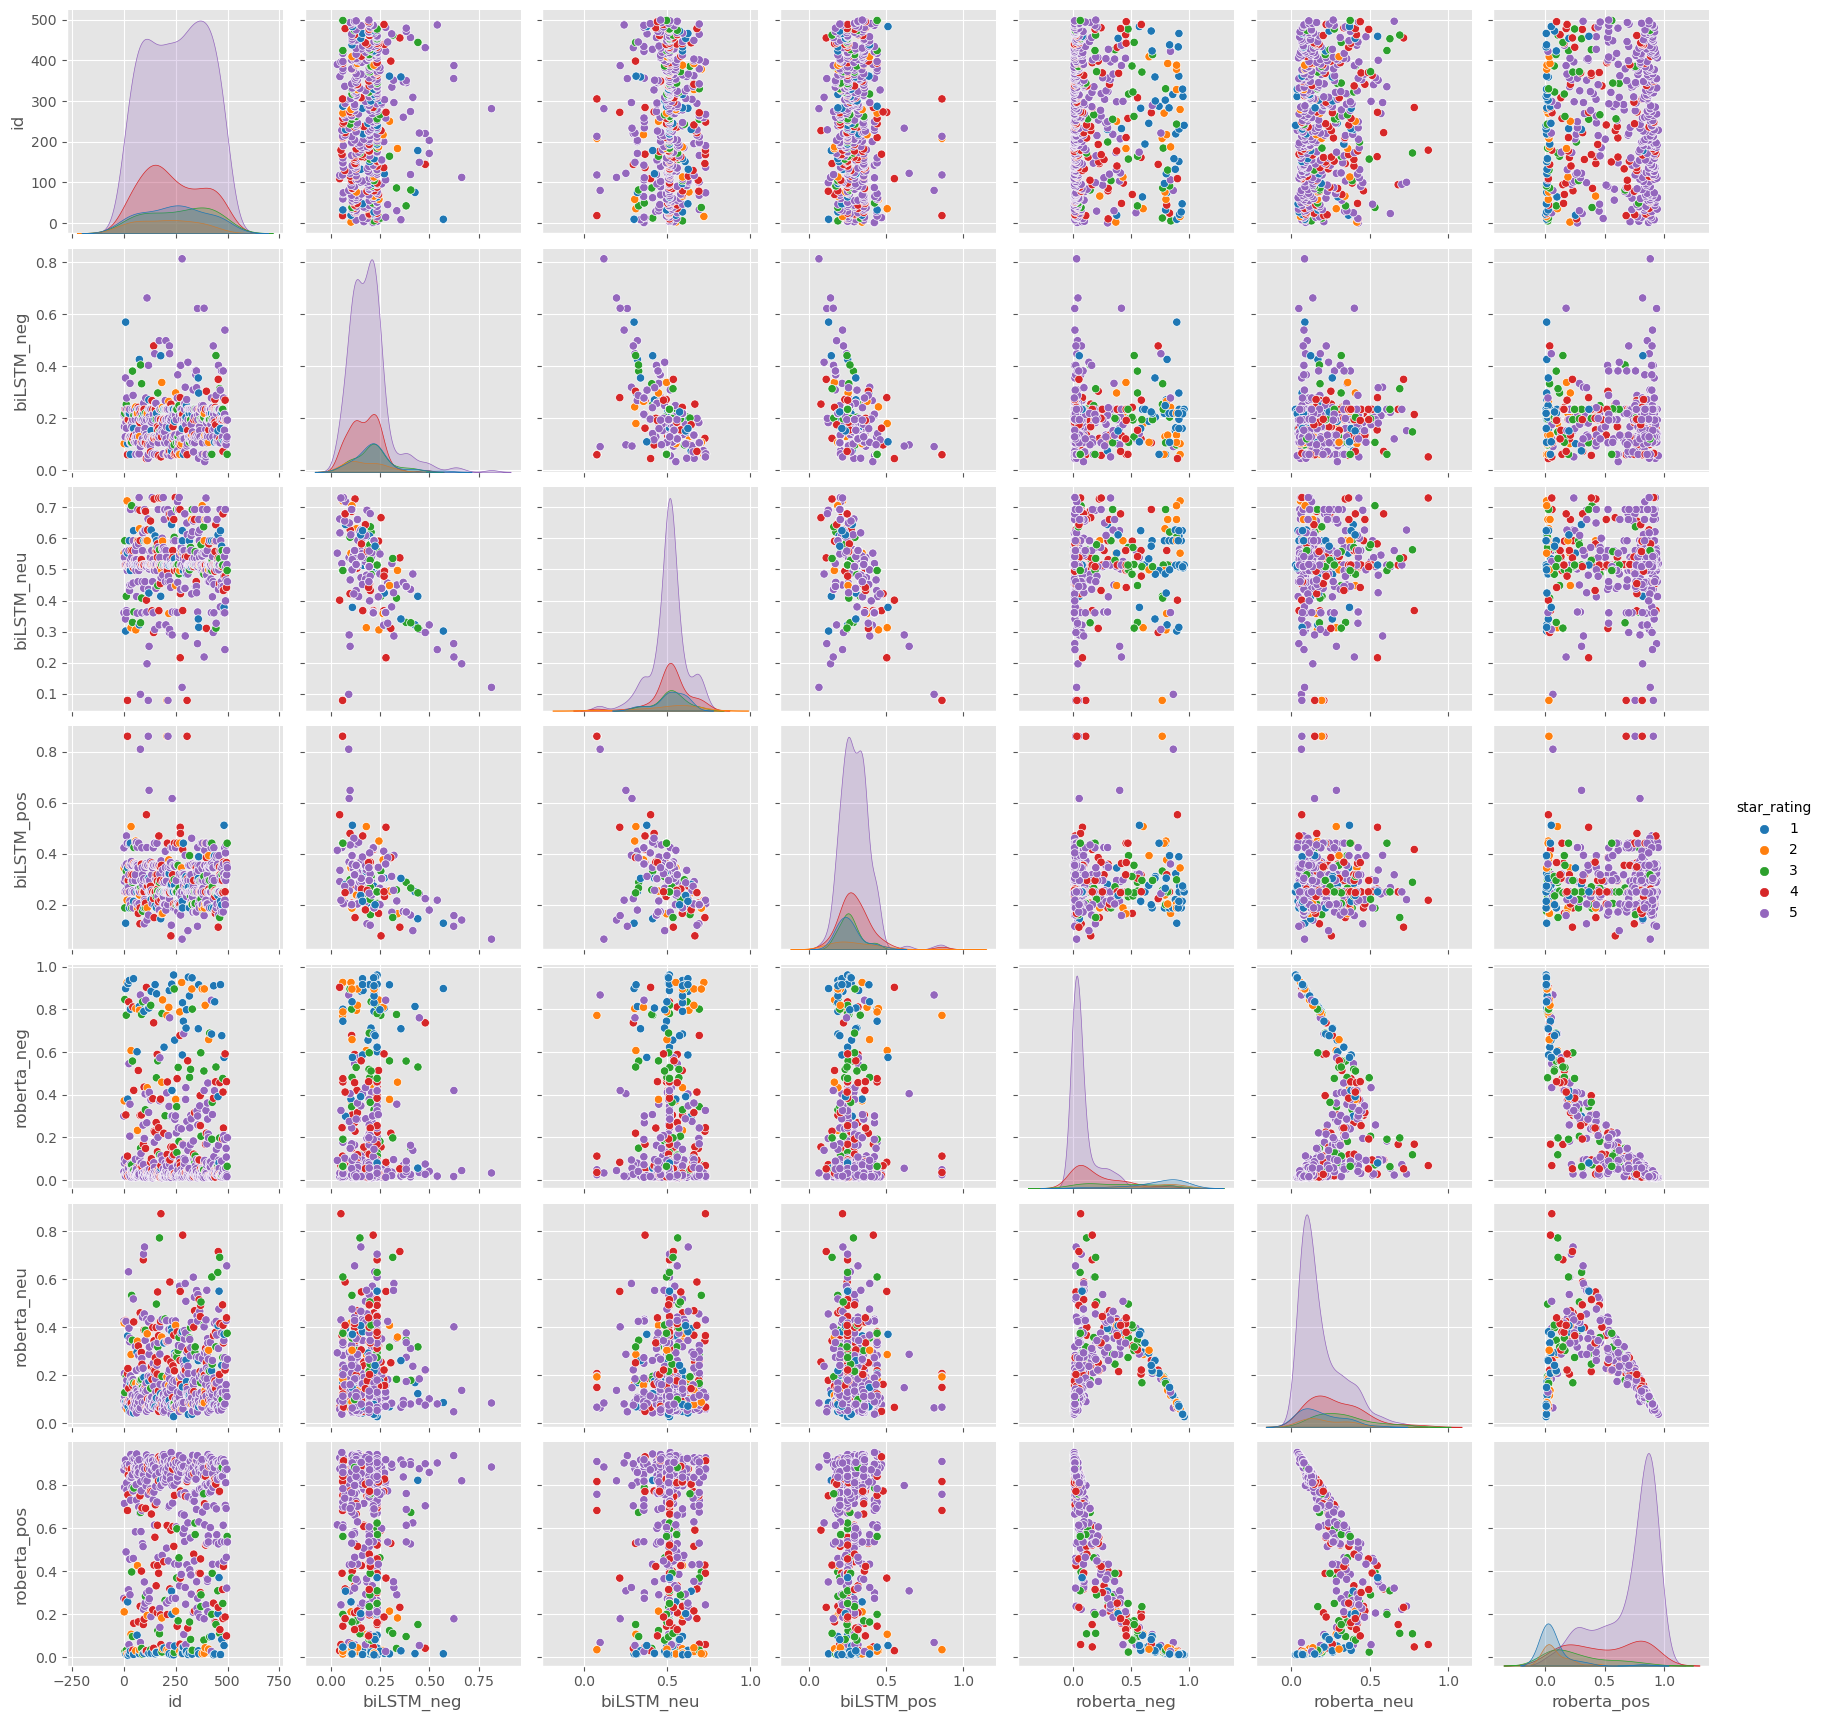

In [26]:
sns.pairplot(data = result_df, 
            vars=['id', 'biLSTM_neg', 'biLSTM_neu', 'biLSTM_pos', 'roberta_neg',
                        'roberta_neu', 'roberta_pos'],
            hue = 'star_rating',
            palette = 'tab10')

plt.show()